In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

dataset = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataset['classification'] = iris.target

dataset.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification
108,6.7,2.5,5.8,1.8,2
93,5.0,2.3,3.3,1.0,1
131,7.9,3.8,6.4,2.0,2
18,5.7,3.8,1.7,0.3,0
68,6.2,2.2,4.5,1.5,1
80,5.5,2.4,3.8,1.1,1
23,5.1,3.3,1.7,0.5,0
78,6.0,2.9,4.5,1.5,1
87,6.3,2.3,4.4,1.3,1
116,6.5,3.0,5.5,1.8,2


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(labels='classification', axis=1), dataset['classification'])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred))

print(model.score(X_test,Y_test))

[[12  0  0]
 [ 0 10  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158


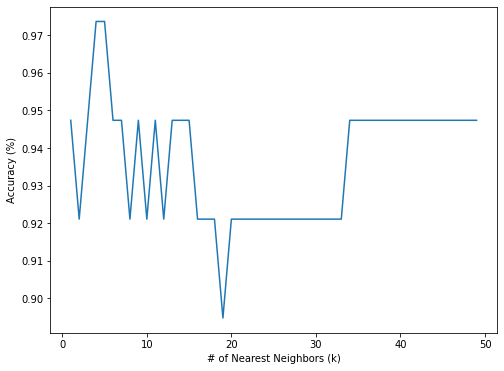

In [66]:
accuracies = []

for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');